In [41]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


In [42]:
from sklearn.datasets import load_iris

# встроенный датасет 
iris = load_iris()
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#Пустых значений в ДФ нет
df.isnull().values.any()

np.False_

<Axes: >

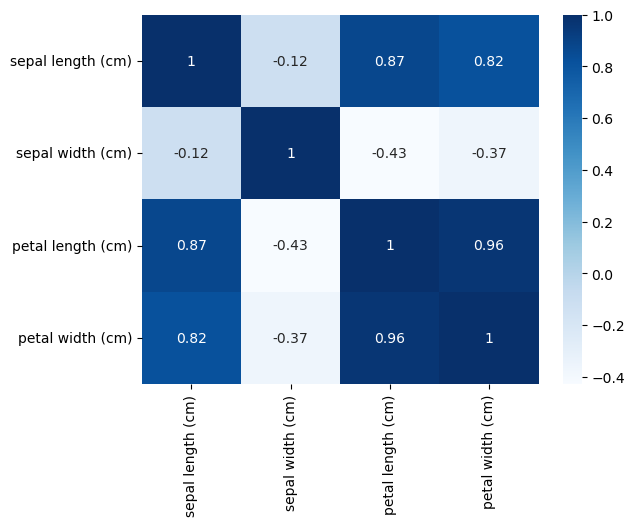

In [46]:
import seaborn as sb
sb.heatmap(df.corr(), cmap="Blues", annot=True)
# Выведем матрицу корреляции признаков

In [47]:
# В iris лежит data и target 
# Убираем последние два столбика (petal length,width)
# В силу большой корреляции
iris_data = iris.data[:, :2]
iris_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [48]:
# выведем таргет - заранее верный ответ
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
len(iris.data)

150

In [50]:
from sklearn.model_selection import train_test_split
# Разбиваем выборку на 2 части:
# iris_data - данные
# iris.targer - целевые метки классов в соотв с данными
# test_size=0.5
# этот параметр задаёт долю данных, выделяемую для тестовой выборки, остальное пойдёт в обучающую выборку
# random_state=0 параметр задает начальное состояние генератора случайных чисел, чтобы обеспечить воспроизводимость результатов

# X_train - обучающая выборка
# X_test - тестовая выборка данных
# y_train - метки классов для обучающей выборки
# y_test - метки классов для тестовой выборки 

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)

In [51]:
# Масштабируем данные методом MaxAbsScaler
# Масштабирование выполняется относительно максимального абсолютного значения в каждом столбце.
# X = X/(max(X))
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
# data_transformer содержит параметры для масштабирования
# Каждый элемент в X_train 
# делится на соответствующее максимальное абсолютное значение своего столбца.
data_transformer = MaxAbsScaler().fit(X_train)
X_train = data_transformer.transform(X_train)
# отмасштабированные данные: 
X_train

array([[0.58227848, 0.75609756],
       [0.74683544, 0.73170732],
       [0.64556962, 0.6097561 ],
       [0.58227848, 0.82926829],
       [0.78481013, 0.53658537],
       [0.91139241, 0.87804878],
       [0.72151899, 0.70731707],
       [0.60759494, 0.73170732],
       [0.89873418, 0.73170732],
       [0.87341772, 0.7804878 ],
       [0.82278481, 0.73170732],
       [0.81012658, 0.68292683],
       [0.64556962, 0.92682927],
       [0.60759494, 0.82926829],
       [0.82278481, 0.7804878 ],
       [0.84810127, 0.80487805],
       [0.56962025, 0.56097561],
       [0.78481013, 0.82926829],
       [0.62025316, 0.73170732],
       [0.72151899, 0.6097561 ],
       [0.87341772, 0.75609756],
       [0.55696203, 0.7804878 ],
       [0.63291139, 0.87804878],
       [0.91139241, 0.73170732],
       [0.64556962, 0.85365854],
       [0.55696203, 0.73170732],
       [0.6835443 , 0.95121951],
       [0.69620253, 0.56097561],
       [0.86075949, 0.7804878 ],
       [0.96202532, 0.73170732],
       [0.

In [52]:
X_test=data_transformer.transform(X_test)
X_test

array([[0.73417722, 0.68292683],
       [0.75949367, 0.53658537],
       [0.69620253, 1.02439024],
       [0.92405063, 0.70731707],
       [0.63291139, 0.82926829],
       [0.79746835, 0.80487805],
       [0.63291139, 0.85365854],
       [0.84810127, 0.75609756],
       [0.86075949, 0.68292683],
       [0.7721519 , 0.68292683],
       [0.7721519 , 0.63414634],
       [0.81012658, 0.7804878 ],
       [0.7721519 , 0.68292683],
       [0.82278481, 0.68292683],
       [0.7721519 , 0.70731707],
       [0.62025316, 0.87804878],
       [0.75949367, 0.70731707],
       [0.69620253, 0.63414634],
       [0.60759494, 0.73170732],
       [0.6835443 , 0.95121951],
       [0.70886076, 0.68292683],
       [0.70886076, 0.73170732],
       [0.60759494, 0.82926829],
       [0.55696203, 0.70731707],
       [0.78481013, 0.68292683],
       [0.58227848, 0.87804878],
       [0.64556962, 0.92682927],
       [0.78481013, 0.70731707],
       [0.63291139, 0.56097561],
       [0.63291139, 0.82926829],
       [0.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# создадим объект класса
# классификатор k-ближайших соседей K-nearest-neighbors для классификации данных
# параметр - кол-во соседей = 1 делает алгоритм очень чувствительным к ближайшим соседям.
# Это может быть полезно для небольших или четко разделенных данных.
# Однако при k=1k=1 алгоритм может быть склонен к переобучению (чувствителен к шуму), 
# поэтому для более сложных задач рекомендуется попробовать k>1k>1.
classifier = KNeighborsClassifier(n_neighbors=1)

# В данном случае для каждого тестового примера 
# модель ищет одного ближайшего соседа в обучающей выборке 
# и присваивает его метку классу тестового объекта.

classifier.fit(X_train, y_train) # Обучаем модель
# В случае KNN это не совсем "обучение" в классическом смысле
# (нет явного построения модели), а просто сохранение данных X_train и y_train, 
# которые будут использоваться при классификации.
# KNN — это ленивый алгоритм обучения, который не делает вычислений до момента предсказания.

y_pred = classifier.predict(X_test) # предсказание классов для объектов тестовой выборки X_test

# Результат y_pred — это массив с предсказанными метками классов для каждого объекта в X_test.
print(len(y_pred))
y_pred


75


array([1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 0, 2])

In [70]:
confusion_matrix(y_test, y_pred)
# матрица ошибок 
# Она показывает, как хорошо классификатор предсказывает метки классов, 
# разбивая результаты по правильным и ошибочным предсказаниям.
# размерность матрицы ошибок: N x N 
# где N - количество классов
# На главной диагонали находятся правильные предсказания.
# Остальные элементы показывают ошибочные предсказания
# TP FP FP
# FN TP FP
# FN FN TP

array([[21,  0,  0],
       [ 1, 14, 15],
       [ 0,  9, 15]])

In [88]:
# С помощью матрицы ошибок можно вычислить метрики классификации, например:

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6666666666666666

In [92]:
# вероятность отнесения к классу

# Для KNN вероятность для класса 
# вычисляется как доля соседей данного класса среди k ближайших соседей.
# Для KNN вероятности могут быть грубыми при малом kk, так как зависят от числа соседей. 
# Увеличение kk может улучшить точность вероятностных оценок.
print(classifier.predict_proba(X_test))

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [167]:
# Задача 1.
# Исследовать качество работы классификатора в зависимости 
# от выбранного метода преобразования данных

# Изучить методы преобразования данных: 
# from sklearn.preprocessing https://scikit-learn.org/stable/modules/preprocessing.html

# Тут нам подойдёт либо Нормализация либо Стандартизация
# Но прежде чем пробовать менять preprocessing, стоит подобрать более эффективное значение 
# параметра k в модели knn классификатора 

# MaxAbsScaler
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)


data_transformer = MaxAbsScaler().fit(X_train)
X_train = data_transformer.transform(X_train)
X_test=data_transformer.transform(X_test)


results = []
indexes = []

for i in range(75):
    clfr = KNeighborsClassifier(n_neighbors=i+1)
    clfr.fit(X_train, y_train) # Обучаем модель

    y_pred = clfr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    indexes.append(i+1)
    


res = pd.DataFrame([results,indexes])
res = res.transpose()
res.columns = ['accur','k']
res = res.sort_values(by='accur', ascending=False)

res['accur'].iloc[0]
res
# Критерий качества - accuracy
# Сформировать таблицу для сравнения

,accur,k
10,0.733333,11.0
12,0.706667,13.0
11,0.706667,12.0
20,0.706667,21.0
14,0.706667,15.0
...,...,...
69,0.360000,70.0
71,0.280000,72.0
72,0.280000,73.0
73,0.280000,74.0


In [170]:
# MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)


data_transformer = MinMaxScaler().fit(X_train)
X_train = data_transformer.transform(X_train)
X_test=data_transformer.transform(X_test)


results = []
indexes = []

for i in range(75):
    clfr = KNeighborsClassifier(n_neighbors=i+1)
    clfr.fit(X_train, y_train) # Обучаем модель

    y_pred = clfr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    indexes.append(i+1)
    


res = pd.DataFrame([results,indexes])
res = res.transpose()
res.columns = ['accur','k']
res = res.sort_values(by='accur', ascending=False)

res['accur'].iloc[0]
res

,accur,k
10,0.720000,11.0
12,0.720000,13.0
11,0.720000,12.0
47,0.706667,48.0
24,0.706667,25.0
...,...,...
70,0.386667,71.0
71,0.280000,72.0
72,0.280000,73.0
73,0.280000,74.0


In [171]:
# StandartScaler

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)

data_transformer = StandardScaler().fit(X_train)

X_train = data_transformer.transform(X_train)
X_test= data_transformer.transform(X_test)


results = []
indexes = []

for i in range(75):
    clfr = KNeighborsClassifier(n_neighbors=i+1)
    clfr.fit(X_train, y_train) # Обучаем модель

    y_pred = clfr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    indexes.append(i+1)
    


res = pd.DataFrame([results,indexes])
res = res.transpose()
res.columns = ['accur','k']
res = res.sort_values(by='accur', ascending=False)

res['accur'].iloc[0]
res


,accur,k
10,0.706667,11.0
12,0.706667,13.0
47,0.706667,48.0
48,0.706667,49.0
28,0.706667,29.0
...,...,...
70,0.360000,71.0
71,0.280000,72.0
72,0.280000,73.0
73,0.280000,74.0


In [174]:
# Normalizer

from sklearn.preprocessing import Normalizer
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)

data_transformer = Normalizer().fit(X_train)

X_train = data_transformer.transform(X_train)
X_test= data_transformer.transform(X_test)


results = []
indexes = []

for i in range(75):
    clfr = KNeighborsClassifier(n_neighbors=i+1)
    clfr.fit(X_train, y_train) # Обучаем модель

    y_pred = clfr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    indexes.append(i+1)
    


res = pd.DataFrame([results,indexes])
res = res.transpose()
res.columns = ['accur','k']
res = res.sort_values(by='accur', ascending=False)

res['accur'].iloc[0]
res

,accur,k
3,0.706667,4.0
4,0.706667,5.0
5,0.680000,6.0
6,0.680000,7.0
21,0.680000,22.0
...,...,...
33,0.560000,34.0
71,0.280000,72.0
72,0.280000,73.0
73,0.280000,74.0


In [178]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)

data_transformer = QuantileTransformer(n_quantiles=10, random_state=0).fit(X_train)

X_train = data_transformer.transform(X_train)
X_test= data_transformer.transform(X_test)


results = []
indexes = []

for i in range(75):
    clfr = KNeighborsClassifier(n_neighbors=i+1)
    clfr.fit(X_train, y_train) # Обучаем модель

    y_pred = clfr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    indexes.append(i+1)
    


res = pd.DataFrame([results,indexes])
res = res.transpose()
res.columns = ['accur','k']
res = res.sort_values(by='accur', ascending=False)

res['accur'].iloc[0]
res


,accur,k
36,0.746667,37.0
26,0.733333,27.0
25,0.733333,26.0
39,0.733333,40.0
31,0.733333,32.0
...,...,...
70,0.453333,71.0
71,0.280000,72.0
72,0.280000,73.0
73,0.280000,74.0


Результаты исследования следующие:
|Метод| MaxAbsScaler | MinMaxScaler | StandartScaler | Normalizer |QuantileTransformer|
|-----|--------------|--------------|----------------|------------|-------------------|
|accur|      0.73    |      0.72    |      0.71      |     0.71   |      0.75         |
|  k  |      11      |      11      |      11        |     4      |         37        |



